# Relatório de Análise VIII

## Identificando e Removendo Outliers

In [29]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

In [30]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

<AxesSubplot:>

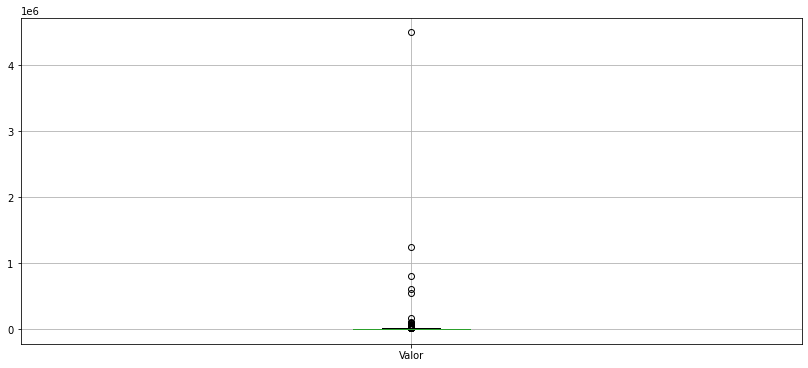

In [31]:
dados.boxplot(['Valor'])

In [32]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
7894,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0
11013,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,NaN
13099,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0
14325,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0
16056,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,NaN


In [33]:
valor = dados['Valor']

In [34]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [35]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

<AxesSubplot:>

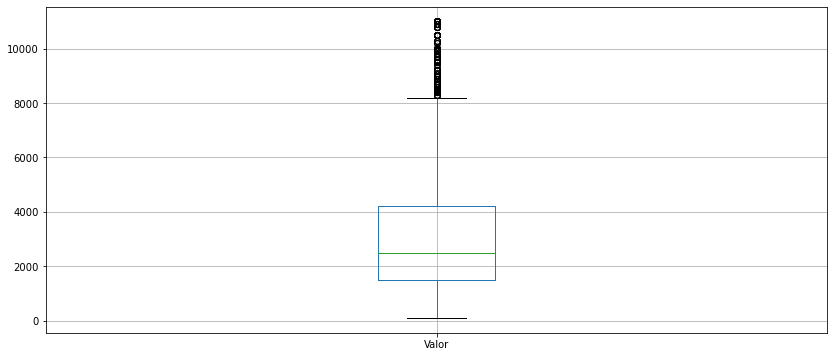

In [36]:
dados_new.boxplot(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

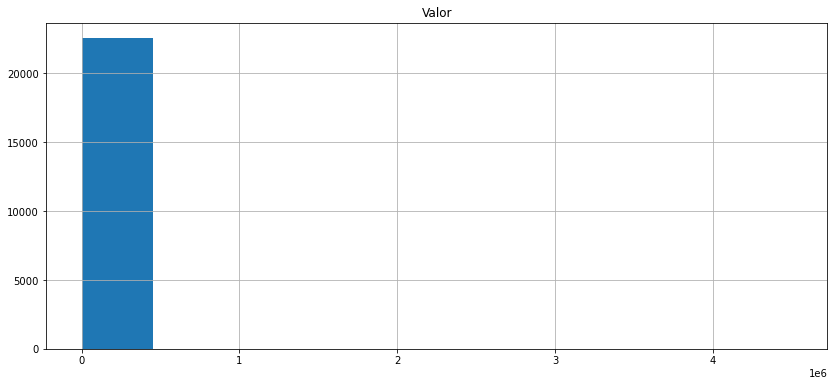

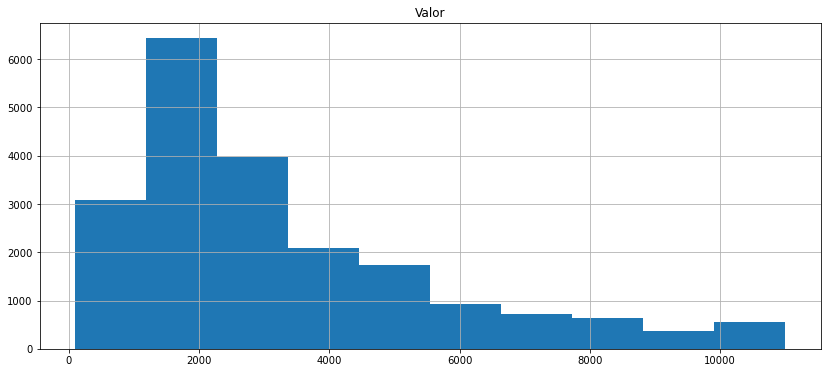

In [37]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

 ## Identificando e Removendo Outliers (continuação)

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

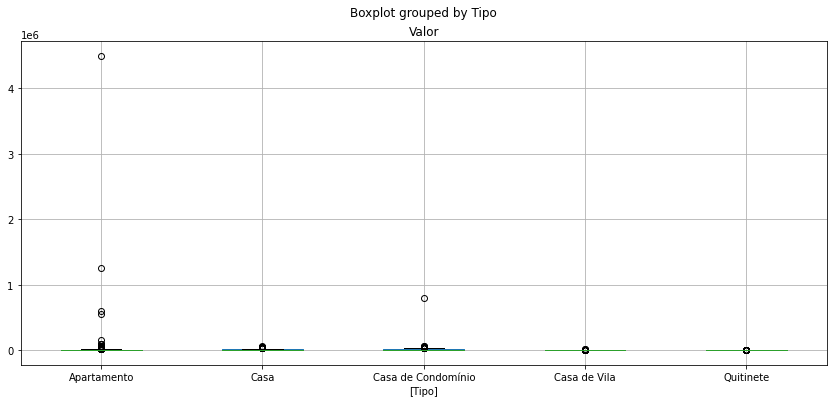

In [38]:
dados.boxplot(['Valor'],  by = ['Tipo'])

In [39]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [40]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [41]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [42]:
Q1

Tipo
Apartamento           1600.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [43]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [44]:
IIQ

Tipo
Apartamento            3400.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64

In [45]:
limite_inferior

Tipo
Apartamento           -3500.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [46]:
limite_superior

Tipo
Apartamento           10100.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [47]:
limite_superior['Apartamento']

10100.0

In [50]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

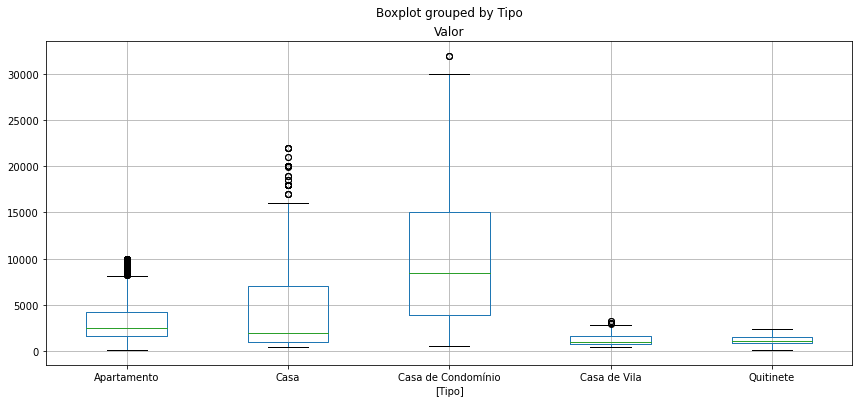

In [51]:
dados_new.boxplot(['Valor'],  by = ['Tipo'])

In [52]:
dados_new.to_csv('dados/aluguel_residencial_sem_outiliers.csv', sep = ';', index = False)